In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import FileLink
import seaborn as sns
import datetime as dt
pd.set_option('display.max_columns', 100)
%matplotlib inline

In [2]:
TrainDataPath = './train/'
TestDataPath = './test/'

Price_S_P = pd.read_csv(TrainDataPath+'price_sales_promotion.csv')
Hist_Vol = pd.read_csv(TrainDataPath+'historical_volume.csv')

In [3]:
Price_S_P.head()

,Agency,SKU,YearMonth,Price,Sales,Promotions
0,Agency_01,SKU_01,201301,1141.500000,1033.432731,108.067269
1,Agency_01,SKU_01,201302,1141.500000,1065.417195,76.082805
2,Agency_01,SKU_01,201303,1179.345820,1101.133633,78.212187
3,Agency_01,SKU_01,201304,1226.687500,1138.283357,88.404143
4,Agency_01,SKU_01,201305,1230.331104,1148.969634,81.361470


In [4]:
Hist_Vol.head()

,Agency,SKU,YearMonth,Volume
0,Agency_22,SKU_01,201301,52.2720
1,Agency_22,SKU_02,201301,110.7000
2,Agency_58,SKU_23,201301,0.0000
3,Agency_48,SKU_07,201301,28.3200
4,Agency_22,SKU_05,201301,238.5387


In [5]:
Hist_Vol['YearMonth'] = pd.to_datetime(Hist_Vol['YearMonth'], format = "%Y%m")

In [6]:
Hist_Vol['YearMonth'].head(10)

0   2013-01-01
1   2013-01-01
2   2013-01-01
3   2013-01-01
4   2013-01-01
5   2013-01-01
6   2013-01-01
7   2013-01-01
8   2013-01-01
9   2013-01-01
Name: YearMonth, dtype: datetime64[ns]

In [7]:
Price_S_P['YearMonth'] = pd.to_datetime(Price_S_P['YearMonth'], format = "%Y%m")

In [8]:
Price_S_P['YearMonth'].head(10)

0   2013-01-01
1   2013-02-01
2   2013-03-01
3   2013-04-01
4   2013-05-01
5   2013-09-01
6   2013-08-01
7   2013-06-01
8   2013-07-01
9   2013-10-01
Name: YearMonth, dtype: datetime64[ns]

In [9]:
Hist_Vol.head(10)

,Agency,SKU,YearMonth,Volume
0,Agency_22,SKU_01,2013-01-01,52.272000
1,Agency_22,SKU_02,2013-01-01,110.700000
2,Agency_58,SKU_23,2013-01-01,0.000000
3,Agency_48,SKU_07,2013-01-01,28.320000
4,Agency_22,SKU_05,2013-01-01,238.538700
5,Agency_58,SKU_17,2013-01-01,0.000000
6,Agency_31,SKU_01,2013-01-01,126.360000
7,Agency_48,SKU_02,2013-01-01,475.790396
8,Agency_40,SKU_04,2013-01-01,1.150200
9,Agency_48,SKU_05,2013-01-01,1823.525772


In [10]:
Hist_Vol = Hist_Vol.set_index(['YearMonth'])

In [11]:
Hist_Vol = Hist_Vol.sort_index()

In [12]:
Hist_Vol.head(10)

,Agency,SKU,Volume
YearMonth,,,
2013-01-01,Agency_22,SKU_01,52.2720
2013-01-01,Agency_37,SKU_04,0.0000
2013-01-01,Agency_59,SKU_03,812.9214
2013-01-01,Agency_11,SKU_01,316.4400
2013-01-01,Agency_05,SKU_05,420.9093
2013-01-01,Agency_28,SKU_06,270.7560
2013-01-01,Agency_05,SKU_02,876.5280
2013-01-01,Agency_57,SKU_03,782.1270
2013-01-01,Agency_52,SKU_04,280.5849


In [9]:
TrainData = Price_S_P

In [10]:
TrainData.head()

,Agency,SKU,YearMonth,Price,Sales,Promotions
0,Agency_01,SKU_01,2013-01-01,1141.500000,1033.432731,108.067269
1,Agency_01,SKU_01,2013-02-01,1141.500000,1065.417195,76.082805
2,Agency_01,SKU_01,2013-03-01,1179.345820,1101.133633,78.212187
3,Agency_01,SKU_01,2013-04-01,1226.687500,1138.283357,88.404143
4,Agency_01,SKU_01,2013-05-01,1230.331104,1148.969634,81.361470


In [11]:
TrainData = TrainData.merge(Hist_Vol, on=['Agency','SKU','YearMonth'], how='left')

In [12]:
TrainData.head()

,Agency,SKU,YearMonth,Price,Sales,Promotions,Volume
0,Agency_01,SKU_01,2013-01-01,1141.500000,1033.432731,108.067269,80.676
1,Agency_01,SKU_01,2013-02-01,1141.500000,1065.417195,76.082805,98.064
2,Agency_01,SKU_01,2013-03-01,1179.345820,1101.133633,78.212187,133.704
3,Agency_01,SKU_01,2013-04-01,1226.687500,1138.283357,88.404143,147.312
4,Agency_01,SKU_01,2013-05-01,1230.331104,1148.969634,81.361470,175.608


In [13]:
TrainData = TrainData.set_index(['YearMonth'])
TrainData = TrainData.sort_index()

In [14]:
TrainData.head(10)

,Agency,SKU,Price,Sales,Promotions,Volume
YearMonth,,,,,,
2013-01-01,Agency_01,SKU_01,1141.500000,1033.432731,108.067269,80.6760
2013-01-01,Agency_28,SKU_05,1534.647887,1534.647887,0.000000,1.6614
2013-01-01,Agency_27,SKU_05,1534.469683,1433.170888,101.298795,74.0601
2013-01-01,Agency_31,SKU_01,1150.000000,1121.542097,28.457903,126.3600
2013-01-01,Agency_26,SKU_05,0.000000,0.000000,0.000000,0.0000
2013-01-01,Agency_25,SKU_05,1316.120807,1202.962318,113.158489,506.9826
2013-01-01,Agency_24,SKU_05,1310.176057,1195.790835,114.385222,433.6893
2013-01-01,Agency_32,SKU_01,1120.036599,1097.425697,22.610902,1747.0080
2013-01-01,Agency_29,SKU_05,1624.964789,1541.840589,83.124200,16.1667


In [15]:
TrainData['TotalPrice'] = TrainData['Price'] * TrainData['Volume']

In [16]:
TrainData.dtypes

Agency         object
SKU            object
Price         float64
Sales         float64
Promotions    float64
Volume        float64
TotalPrice    float64
dtype: object

In [18]:
TrainData.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 21000 entries, 2013-01-01 to 2017-12-01
Data columns (total 7 columns):
Agency        21000 non-null object
SKU           21000 non-null object
Price         21000 non-null float64
Sales         21000 non-null float64
Promotions    21000 non-null float64
Volume        21000 non-null float64
TotalPrice    21000 non-null float64
dtypes: float64(5), object(2)
memory usage: 1.9+ MB


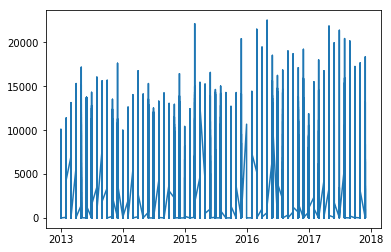

In [31]:
plt.plot(TrainData['Volume'])
plt.show()

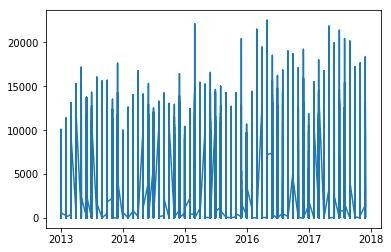

In [42]:
plt.plot(Hist_Vol['Volume'])
plt.show()

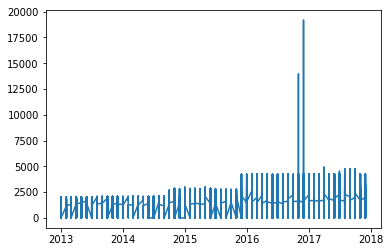

In [44]:
plt.plot(Price_S_P['Price'])
plt.show()

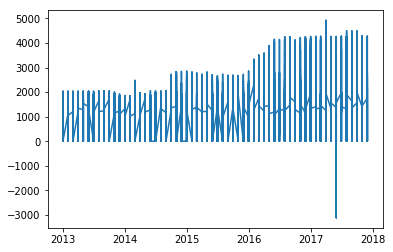

In [45]:
plt.plot(Price_S_P['Sales'])
plt.show()

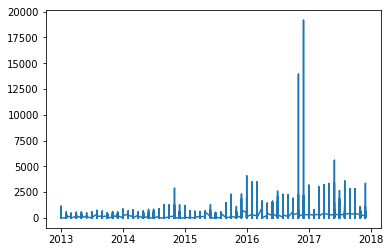

In [46]:
plt.plot(Price_S_P['Promotions'])
plt.show()

In [93]:
Price_S_P = Price_S_P.set_index(['YearMonth'])

In [94]:
Price_S_P = Price_S_P.sort_index()

In [95]:
Price_S_P.head(30)

,Agency,SKU,Price,Sales,Promotions
YearMonth,,,,,
2013-01-01,Agency_01,SKU_01,1141.500000,1033.432731,108.067269
2013-01-01,Agency_28,SKU_05,1534.647887,1534.647887,0.000000
2013-01-01,Agency_27,SKU_05,1534.469683,1433.170888,101.298795
2013-01-01,Agency_31,SKU_01,1150.000000,1121.542097,28.457903
2013-01-01,Agency_26,SKU_05,0.000000,0.000000,0.000000
2013-01-01,Agency_25,SKU_05,1316.120807,1202.962318,113.158489
2013-01-01,Agency_24,SKU_05,1310.176057,1195.790835,114.385222
2013-01-01,Agency_32,SKU_01,1120.036599,1097.425697,22.610902
2013-01-01,Agency_29,SKU_05,1624.964789,1541.840589,83.124200


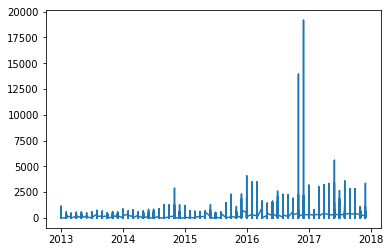

In [34]:
plt.plot(Price_S_P['Promotions'])
plt.show()

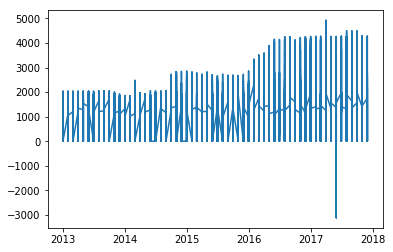

In [32]:
plt.plot(Price_S_P['Sales'])
plt.show()

In [33]:
Price_S_P[Price_S_P['Sales'] < 0]

,Agency,SKU,Price,Sales,Promotions
YearMonth,,,,,
2017-06-01,Agency_46,SKU_17,2463.06338,-3121.690141,5584.753521


In [ ]:
plt.plot(Price_S_P[''])
plt.show()

In [6]:
Hist_Vol.head()

,Agency,SKU,YearMonth,Volume
0,Agency_22,SKU_01,201301,52.2720
1,Agency_22,SKU_02,201301,110.7000
2,Agency_58,SKU_23,201301,0.0000
3,Agency_48,SKU_07,201301,28.3200
4,Agency_22,SKU_05,201301,238.5387


In [7]:
Price_S_P.dtypes

Agency         object
SKU            object
YearMonth       int64
Price         float64
Sales         float64
Promotions    float64
dtype: object

In [22]:
X=TrainData['2013-01']

In [100]:
X.sort_values(['Agency', 'SKU'])

,Agency,SKU,Price,Sales,Promotions,Volume,TotalPrice
YearMonth,,,,,,,
2013-01-01,Agency_01,SKU_01,1141.500000,1033.432731,108.067269,80.6760,9.209165e+04
2013-01-01,Agency_01,SKU_02,1074.157799,969.186209,104.971591,78.4080,8.422256e+04
2013-01-01,Agency_01,SKU_03,1239.734043,1141.894806,97.839237,35.9550,4.457464e+04
2013-01-01,Agency_01,SKU_04,1725.711827,1467.681860,258.029967,230.2956,3.974238e+05
2013-01-01,Agency_01,SKU_05,1260.322817,1172.763381,87.559436,15.9750,2.013366e+04
2013-01-01,Agency_01,SKU_11,1779.102113,1672.084507,107.017606,7.6680,1.364216e+04
2013-01-01,Agency_02,SKU_01,1112.754748,1033.372521,79.382227,6512.9400,7.247305e+06
2013-01-01,Agency_02,SKU_02,1076.408593,994.178110,82.230483,8422.1640,9.065690e+06
2013-01-01,Agency_02,SKU_03,1250.300782,1129.909681,120.391101,7332.0282,9.167241e+06


In [23]:
X=TrainData['2013-02']
X.sort_values(['Agency', 'SKU'])

,Agency,SKU,Price,Sales,Promotions,Volume,TotalPrice
YearMonth,,,,,,,
2013-02-01,Agency_01,SKU_01,1141.500000,1065.417195,76.082805,98.06400,1.119401e+05
2013-02-01,Agency_01,SKU_02,1074.944845,996.950762,77.994083,99.25200,1.066904e+05
2013-02-01,Agency_01,SKU_03,1239.734043,1154.786791,84.947252,45.68400,5.663601e+04
2013-02-01,Agency_01,SKU_04,1728.545508,1500.037283,228.508225,270.48870,4.675520e+05
2013-02-01,Agency_01,SKU_05,1258.597166,1171.803584,86.793582,16.42230,2.066906e+04
2013-02-01,Agency_01,SKU_11,1776.870126,1650.025754,126.844372,10.30920,1.831811e+04
2013-02-01,Agency_02,SKU_01,1125.524852,1073.643772,51.881080,7408.47600,8.338424e+06
2013-02-01,Agency_02,SKU_02,1084.037897,1028.759895,55.278002,9546.44250,1.034871e+07
2013-02-01,Agency_02,SKU_03,1248.072560,1162.879613,85.192947,8306.19750,1.036674e+07


In [102]:
X.sort_values(['Agency', 'SKU'])

,Agency,SKU,Price,Sales,Promotions,Volume,TotalPrice
YearMonth,,,,,,,
2013-02-01,Agency_01,SKU_01,1141.500000,1065.417195,76.082805,98.06400,1.119401e+05
2013-02-01,Agency_01,SKU_02,1074.944845,996.950762,77.994083,99.25200,1.066904e+05
2013-02-01,Agency_01,SKU_03,1239.734043,1154.786791,84.947252,45.68400,5.663601e+04
2013-02-01,Agency_01,SKU_04,1728.545508,1500.037283,228.508225,270.48870,4.675520e+05
2013-02-01,Agency_01,SKU_05,1258.597166,1171.803584,86.793582,16.42230,2.066906e+04
2013-02-01,Agency_01,SKU_11,1776.870126,1650.025754,126.844372,10.30920,1.831811e+04
2013-02-01,Agency_02,SKU_01,1125.524852,1073.643772,51.881080,7408.47600,8.338424e+06
2013-02-01,Agency_02,SKU_02,1084.037897,1028.759895,55.278002,9546.44250,1.034871e+07
2013-02-01,Agency_02,SKU_03,1248.072560,1162.879613,85.192947,8306.19750,1.036674e+07


In [75]:
TrainData.sort_values(['Agency', 'SKU'])

,Agency,SKU,Price,Sales,Promotions,Volume,TotalPrice
YearMonth,,,,,,,
2013-01-01,Agency_01,SKU_01,1141.500000,1033.432731,108.067269,80.676,92091.654000
2013-02-01,Agency_01,SKU_01,1141.500000,1065.417195,76.082805,98.064,111940.056000
2013-03-01,Agency_01,SKU_01,1179.345820,1101.133633,78.212187,133.704,157683.253517
2013-04-01,Agency_01,SKU_01,1226.687500,1138.283357,88.404143,147.312,180705.789000
2013-05-01,Agency_01,SKU_01,1230.331104,1148.969634,81.361470,175.608,216055.984511
2013-06-01,Agency_01,SKU_01,1234.832064,1144.291368,90.540696,180.792,223247.758515
2013-07-01,Agency_01,SKU_01,1234.868827,1157.884598,76.984229,149.796,184978.410809
2013-08-01,Agency_01,SKU_01,1234.828586,1186.746188,48.082398,161.136,198975.339034
2013-09-01,Agency_01,SKU_01,1234.802266,1152.156204,82.646062,147.744,182434.625988


In [17]:
TestData = pd.read_csv(TestDataPath+'volume_forecast.csv')

In [18]:
for i in range(13,18):
    for j in range(1,13):
        if(j < 10):
            TrainData['20'+str(i)+'-'+'0'+str(j)] = TrainData['20'+str(i)+'-'+'0'+str(j)].sort_values(['Agency', 'SKU'])
        else:
            TrainData['20'+str(i)+'-'+str(j)] = TrainData['20'+str(i)+'-'+str(j)].sort_values(['Agency', 'SKU'])

In [19]:
TrainData

,Agency,SKU,Price,Sales,Promotions,Volume,TotalPrice
YearMonth,,,,,,,
2013-01-01,Agency_01,SKU_01,1141.500000,1033.432731,108.067269,80.67600,9.209165e+04
2013-01-01,Agency_01,SKU_02,1074.157799,969.186209,104.971591,78.40800,8.422256e+04
2013-01-01,Agency_01,SKU_03,1239.734043,1141.894806,97.839237,35.95500,4.457464e+04
2013-01-01,Agency_01,SKU_04,1725.711827,1467.681860,258.029967,230.29560,3.974238e+05
2013-01-01,Agency_01,SKU_05,1260.322817,1172.763381,87.559436,15.97500,2.013366e+04
2013-01-01,Agency_01,SKU_11,1779.102113,1672.084507,107.017606,7.66800,1.364216e+04
2013-01-01,Agency_02,SKU_01,1112.754748,1033.372521,79.382227,6512.94000,7.247305e+06
2013-01-01,Agency_02,SKU_02,1076.408593,994.178110,82.230483,8422.16400,9.065690e+06
2013-01-01,Agency_02,SKU_03,1250.300782,1129.909681,120.391101,7332.02820,9.167241e+06


In [20]:
X = TrainData.drop(['Volume'], axis=1)

In [21]:
X.shape

(21000, 6)

In [34]:
X['Agency'] = X['Agency'].str.extract('(\d+)', expand=True).astype(float)

In [36]:
X['SKU'] = X['SKU'].str.extract('(\d+)', expand=True).astype(float)

In [37]:
X.head(10)

,Agency,SKU,Price,Sales,Promotions,TotalPrice
YearMonth,,,,,,
2013-01-01,1.0,1.0,1141.500000,1033.432731,108.067269,9.209165e+04
2013-01-01,1.0,2.0,1074.157799,969.186209,104.971591,8.422256e+04
2013-01-01,1.0,3.0,1239.734043,1141.894806,97.839237,4.457464e+04
2013-01-01,1.0,4.0,1725.711827,1467.681860,258.029967,3.974238e+05
2013-01-01,1.0,5.0,1260.322817,1172.763381,87.559436,2.013366e+04
2013-01-01,1.0,11.0,1779.102113,1672.084507,107.017606,1.364216e+04
2013-01-01,2.0,1.0,1112.754748,1033.372521,79.382227,7.247305e+06
2013-01-01,2.0,2.0,1076.408593,994.178110,82.230483,9.065690e+06
2013-01-01,2.0,3.0,1250.300782,1129.909681,120.391101,9.167241e+06


In [38]:
X_train = X['2013-01-01':'2017-11-01']
X_test = X['2017-12-01':]

In [39]:
print(X_train.shape)
print(X_test.shape)

(20650, 6)
(350, 6)


In [40]:
X_train

,Agency,SKU,Price,Sales,Promotions,TotalPrice
YearMonth,,,,,,
2013-01-01,1.0,1.0,1141.500000,1033.432731,108.067269,9.209165e+04
2013-01-01,1.0,2.0,1074.157799,969.186209,104.971591,8.422256e+04
2013-01-01,1.0,3.0,1239.734043,1141.894806,97.839237,4.457464e+04
2013-01-01,1.0,4.0,1725.711827,1467.681860,258.029967,3.974238e+05
2013-01-01,1.0,5.0,1260.322817,1172.763381,87.559436,2.013366e+04
2013-01-01,1.0,11.0,1779.102113,1672.084507,107.017606,1.364216e+04
2013-01-01,2.0,1.0,1112.754748,1033.372521,79.382227,7.247305e+06
2013-01-01,2.0,2.0,1076.408593,994.178110,82.230483,9.065690e+06
2013-01-01,2.0,3.0,1250.300782,1129.909681,120.391101,9.167241e+06


In [41]:
Y = TrainData['2013-02-01':'2017-12-01']['Volume']

In [42]:
Y.shape

(20650,)

In [43]:
import xgboost as xgb

/home/sparsh/anaconda2/envs/py35/lib/python3.5/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [124]:
xgb_reg = xgb.XGBRegressor(n_estimators=100, seed=1729, max_depth=3)

In [125]:
xgb_reg.fit(X_train, Y)

XGBRegressor(base_score=0.5, colsample_bylevel=1, colsample_bytree=1, gamma=0,
       learning_rate=0.1, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=100, nthread=-1,
       objective='reg:linear', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=1729, silent=True, subsample=1)

In [126]:
pred = xgb_reg.predict(X_test)

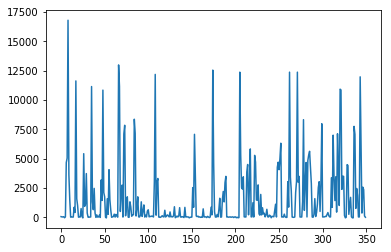

In [127]:
plt.plot(pred)
plt.show()

In [128]:
test = X_test.copy()

In [129]:
test['Volume'] = pred

In [76]:
from sklearn.metrics import mean_squared_error

In [130]:
np.sqrt(mean_squared_error(TrainData['2017-12']['Volume'], pred))

300.3671843835572

In [131]:
TrainData['2017-12']['Volume']

YearMonth
2017-12-01       35.53200
2017-12-01       17.17200
2017-12-01       10.91340
2017-12-01       80.70570
2017-12-01       15.14430
2017-12-01       22.06680
2017-12-01     4335.44400
2017-12-01     4518.50400
2017-12-01    18350.92500
2017-12-01     3636.48525
2017-12-01     1387.97175
2017-12-01        1.27800
2017-12-01        0.00000
2017-12-01        0.00000
2017-12-01        5.75250
2017-12-01      730.94400
2017-12-01      338.04000
2017-12-01    11057.73000
2017-12-01     1313.33700
2017-12-01      789.93150
2017-12-01        0.12780
2017-12-01       13.93200
2017-12-01        1.18800
2017-12-01      632.30040
2017-12-01       92.71890
2017-12-01        0.76680
2017-12-01     4852.98000
2017-12-01      848.12400
2017-12-01      939.22950
2017-12-01     5670.35850
                 ...     
2017-12-01    11322.93750
2017-12-01     9630.90000
2017-12-01     2244.52275
2017-12-01     3278.90100
2017-12-01     3645.55875
2017-12-01      136.73250
2017-12-01        0.04260
20

In [132]:
pred

array([ 4.74175377e+01,  2.47634068e+01,  1.95455532e+01,  3.92393913e+01,
       -4.70881233e+01,  2.24612103e+01,  4.65784326e+03,  5.04132275e+03,
        1.68064707e+04,  3.62365259e+03,  1.48407361e+03,  5.97152662e+00,
        1.56243048e+01,  1.56243048e+01,  9.23365593e+00,  8.42666138e+02,
        4.03836761e+02,  1.16274902e+04,  1.57277356e+03,  9.82083496e+02,
        1.01409149e+00,  2.01628399e+01,  1.78723965e+01,  7.36792114e+02,
        6.20660286e+01, -6.06194763e+01,  5.41897070e+03,  9.22598450e+02,
        1.10515710e+03,  3.72206665e+03,  3.57712341e+02,  1.01409149e+00,
       -3.97712469e+00,  1.56243048e+01,  1.56243048e+01,  1.11483232e+04,
        1.31086243e+03,  6.38362000e+02,  2.45735913e+03,  3.52507904e+02,
       -1.38210964e+01,  1.93505356e+02,  9.59629822e+00,  2.13869305e+01,
        1.80263412e+02, -2.13912601e+01,  3.18008447e+03,  1.42829211e+03,
        1.08435986e+04,  2.10121411e+03,  1.73693005e+03, -8.82987976e+00,
       -6.23607712e+01,  

In [133]:
test

,Agency,SKU,Price,Sales,Promotions,TotalPrice,Volume
YearMonth,,,,,,,
2017-12-01,1.0,1.0,1663.797492,1390.112272,273.685220,5.911805e+04,47.417538
2017-12-01,1.0,2.0,1697.575472,1412.680031,284.895441,2.915077e+04,24.763407
2017-12-01,1.0,3.0,1640.111950,1443.480950,196.631000,1.789920e+04,19.545553
2017-12-01,1.0,4.0,2562.440869,2093.641230,468.799639,2.068036e+05,39.239391
2017-12-01,1.0,5.0,2025.049474,1572.014619,453.034855,3.066796e+04,-47.088123
2017-12-01,1.0,11.0,1713.254357,1560.029162,153.225195,3.780604e+04,22.461210
2017-12-01,2.0,1.0,1678.982073,1404.235415,274.746658,7.279133e+06,4657.843262
2017-12-01,2.0,2.0,1687.100349,1405.828864,281.271485,7.623170e+06,5041.322754
2017-12-01,2.0,3.0,1681.601110,1414.428980,267.172130,3.085894e+07,16806.470703


In [134]:
TrainData['Volume']

YearMonth
2013-01-01       80.67600
2013-01-01       78.40800
2013-01-01       35.95500
2013-01-01      230.29560
2013-01-01       15.97500
2013-01-01        7.66800
2013-01-01     6512.94000
2013-01-01     8422.16400
2013-01-01     7332.02820
2013-01-01     6256.38510
2013-01-01     2629.29330
2013-01-01        0.00000
2013-01-01       69.82500
2013-01-01       92.48250
2013-01-01      106.64250
2013-01-01     3546.72000
2013-01-01      972.32400
2013-01-01     6899.72220
2013-01-01     2332.22220
2013-01-01      854.02350
2013-01-01       10.03230
2013-01-01       21.81600
2013-01-01       71.49600
2013-01-01      389.66760
2013-01-01      101.40930
2013-01-01       14.24970
2013-01-01     8780.50800
2013-01-01      876.52800
2013-01-01      632.04660
2013-01-01     4036.17960
                 ...     
2017-12-01    11322.93750
2017-12-01     9630.90000
2017-12-01     2244.52275
2017-12-01     3278.90100
2017-12-01     3645.55875
2017-12-01      136.73250
2017-12-01        0.04260
20

In [163]:
test.loc[test['Volume'] < 0.0, 'Volume'] = 0.0

In [164]:
test

,Agency,SKU,Price,Sales,Promotions,TotalPrice,Volume
YearMonth,,,,,,,
2017-12-01,1.0,1.0,1663.797492,1390.112272,273.685220,5.911805e+04,47.417538
2017-12-01,1.0,2.0,1697.575472,1412.680031,284.895441,2.915077e+04,24.763407
2017-12-01,1.0,3.0,1640.111950,1443.480950,196.631000,1.789920e+04,19.545553
2017-12-01,1.0,4.0,2562.440869,2093.641230,468.799639,2.068036e+05,39.239391
2017-12-01,1.0,5.0,2025.049474,1572.014619,453.034855,3.066796e+04,0.000000
2017-12-01,1.0,11.0,1713.254357,1560.029162,153.225195,3.780604e+04,22.461210
2017-12-01,2.0,1.0,1678.982073,1404.235415,274.746658,7.279133e+06,4657.843262
2017-12-01,2.0,2.0,1687.100349,1405.828864,281.271485,7.623170e+06,5041.322754
2017-12-01,2.0,3.0,1681.601110,1414.428980,267.172130,3.085894e+07,16806.470703


In [165]:
TESTDATA = pd.read_csv(TestDataPath+'volume_forecast.csv')

In [166]:
TESTDATA

,Agency,SKU,Volume
0,Agency_23,SKU_06,NaN
1,Agency_34,SKU_20,NaN
2,Agency_24,SKU_02,NaN
3,Agency_40,SKU_06,NaN
4,Agency_42,SKU_32,NaN
5,Agency_08,SKU_02,NaN
6,Agency_35,SKU_26,NaN
7,Agency_13,SKU_18,NaN
8,Agency_40,SKU_27,NaN
9,Agency_07,SKU_04,NaN


In [167]:
TESTDATA['SKU'] = TESTDATA['SKU'].str.extract('(\d+)', expand=True).astype(float)

In [168]:
TESTDATA['Agency'] = TESTDATA['Agency'].str.extract('(\d+)', expand=True).astype(float)

In [171]:
TESTDATA = TESTDATA.merge(test, on=['Agency','SKU'], how='left')

In [176]:
TESTDATA = TESTDATA.drop(['Volume_x', 'Price', 'Sales', 'Promotions', 'TotalPrice'], axis =1)

In [177]:
TESTDATA

,Agency,SKU,Volume_y
0,23.0,6.0,NaN
1,34.0,20.0,NaN
2,24.0,2.0,98.513214
3,40.0,6.0,NaN
4,42.0,32.0,NaN
5,8.0,2.0,9.596298
6,35.0,26.0,NaN
7,13.0,18.0,NaN
8,40.0,27.0,NaN
9,7.0,4.0,2457.359131


In [178]:
TESTDATA.isnull().sum()

Agency         0
SKU            0
Volume_y    1100
dtype: int64